In [1]:
import importlib.util
if importlib.util.find_spec('empylib') is None:
    !pip install git+https://github.com/PanxoPanza/empylib.git

# Ondas electromagnéticas en la materia

## Características principales de una onda en un medio

### Ecuaciones de Maxwell
La materia esta compuesta por cargas (electrones, átomos, moléculas). Por lo tanto, a diferencia del vacío, la densidad de carga ($\rho$) y de corriente ($\vec{J}$) eléctricas están presentes en las ecuaciones de Maxwell:

\begin{align*}
\nabla\cdot\vec{E} &= \frac{\rho}{\varepsilon_0} \\
\nabla\cdot\vec{B} &= 0 \\
\nabla\times\vec{E} &= -\mu_0\frac{\partial \vec{H}}{\partial t} \\
\nabla\times\vec{H} &= \vec{J} + \varepsilon_0\frac{\partial \vec{E}}{\partial t}
\end{align*}

Asumiendo un medio homogéneo, podemos demostrar que las ecuaciones de Maxwell se pueden reescribir en la forma:

\begin{align*}
\nabla\cdot\vec{E} &= 0 \\
\nabla\cdot\vec{H} &= 0 \\
\nabla\times\vec{E} &= -\mu_0\frac{\partial \vec{H}}{\partial t} \\
\nabla\times\vec{H} &= \varepsilon_0 \varepsilon\frac{\partial\vec{E}}{\partial t}
\end{align*}

donde $\varepsilon = \varepsilon' + i\varepsilon''$, es la **constante dieléctrica compleja**.

Estas ecuaciones tiene la misma forma que las ecuaciones de Maxwell en el vacío. Así las ondas EM en un medio también se comportan como onda transversales, con la condición $\hat{k}\perp \hat{e} \perp \hat{h}$.

**¿Qué representa la constante dielectrica compleja?**

Los materiales están compuestos de átomos, con un núcleo positivo y electrones negativos. La interacción de la luz con las cargas eléctricas en la materia induce oscilaciones que generan dos efectos:

- **Polarización**. Formación de *dipolos eléctricos (polo eléctrico positivo y otro negativo separados por una distancia $d$)* **La parte real de la constante dieléctrica ($\varepsilon'$) representa la intesidad de la polarización** *y esta directamente relacionada con la capacitancia.*

- **Disipación de energía.** Producto de las coliciones entre núcleos, electrones, o entre núcleos y electrones. **La parte imaginaria de la constante dieléctrica ($\varepsilon''$) representa la magnitud de la disipación de energía.** *Esta directamente relacionada con la resistividad eléctrica.*

<img src="./images/constante_dielectrica.png" width="800px" align= center>

### Relación de dispersión e íncide de refracción

El principal cambio en la propagación de ondas en la materia está en la **relación de dispersión** ($\omega$ vs $k$). En este caso:

\begin{equation}
k = N \frac{\omega}{c_0} = Nk_0
\end{equation}

donde $N = \sqrt{\varepsilon} = n +i\kappa$, es el **índice de refracción complejo**. Aquí, $n$ se conoce como el **índice de refracción**, y $\kappa$ como **extinción**.

El **índice de refracción complejo es una propiedad del material**. En general, este valor varía con la longitud de onda (o frecuencia). 

In [2]:
%%capture show1
import empylib.nklib as nk
import numpy as np
import matplotlib.pyplot as plt

lam = np.linspace(0.3,1.0,100) # espectro de longitudes de onda (en micrones)
N   = nk.gold(lam)             # índice de refracción complejo del oro

plt.plot(lam,N.real,'-k' ,label='$n$')
plt.plot(lam,N.imag,'--k',label='$\kappa$')
plt.xlabel('longitud de onda ($\mu$m)')
plt.ylabel('índice de refracción')
plt.title('Índice de refracción del oro')
plt.ylim(0)
plt.legend()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\k'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1029/187430635.py:9: SyntaxWarning: invalid escape sequence '\k'
  plt.plot(lam,N.imag,'--k',label='$\kappa$')
/tmp/ipykernel_1029/187430635.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('longitud de onda ($\mu$m)')


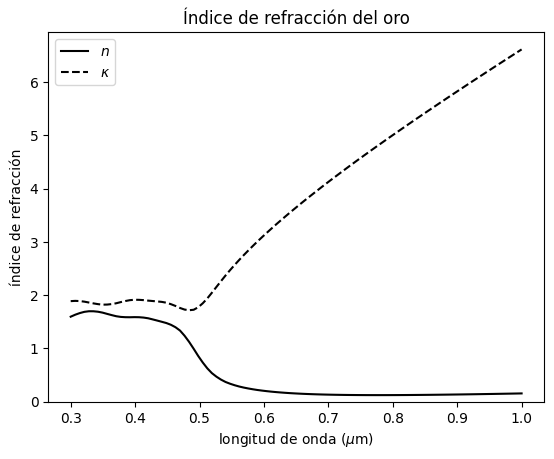

In [3]:
show1()

**Los materiales no metálicos, comúnmente, toman valores reales constantes en el espectro visible**:

<img src="./images/refractive_index_table.png" width="700px" align= center>


**¿Que significa que el vector de onda sea complejo?**

Analicemos la solución general de la ecuación de onda:

\begin{align*}
\vec{E} &= E_0 e^{i\left(\vec{k}\cdot\vec{r} - \omega t\right)} \hat{e} \\
&= E_0 e^{i\left(Nk_0\hat{k}\cdot\vec{r} - \omega t\right)} \hat{e} \\
&= E_0 e^{i\left(nk_0\hat{k}\cdot\vec{r} - \omega t\right)}e^{-\left(\kappa k_0\hat{k}\cdot\vec{r}\right)} \hat{e}
\end{align*}

- **$e^{i\left(nk_0\hat{k}\cdot\vec{r} - \omega t\right)}$, expresa la parte oscilatoria de la onda**. La longitud de onda en el medio, entonces, tiene la forma:

\begin{equation}
\lambda_n = \lambda/n
\end{equation}

- **$e^{-\left(\kappa k_0\hat{k}\cdot\vec{r}\right)}$, indica el decaimiento de la onda,** proporcional a la extinción $\kappa$.

Gráficamente, asumiendo $\hat{k} = \hat{z}$:

<img src="./images/decaying_wave.png" width="350px" align= center>

El cambio en la longitud de onda en un material también implica un cambio en la **velocidad de propagación de la onda:**

\begin{equation}
v_\mathrm{p} = \mathrm{Re}\left(\frac{\omega}{k}\right) = \frac{c_0}{n}\quad\quad\mathrm{Velocidad~en~un~medio~con~índice~de~refracción}~N
\end{equation}

> Notar que para $n > 1$ la onda se mueve a una velocidad más lenta que en el vacío

### Amplitud del campo magnético

Igualmente, la relación entre $H_0$ y $E_0$ también cambia a la forma 

$$H_0 = \frac{E_0}{Z_0Z_r},$$

donde $Z_r = \sqrt{\frac{1}{\varepsilon}}$ es la **impedancia relativa**.

> Notar que $H_0$ es un número complejo, aún cuando $E_0$ es real.

### Flujo de energía (Vector de Poynting)

El decaimiento de la amplitud de $E_0$ debido a $\kappa$ ocurre debido a la absorción de energía electromagnética en el material. Para cuantificar está pérdida de energía debemos analizar el **vector de Poynting**, $\langle\vec{S}\rangle = \frac{1}{2}\mathrm{Re}\left(\vec{E}\times\vec{H}^*\right)$.

En este caso:
\begin{equation}
\langle\vec{S}\rangle =\frac{nE_0^2}{2Z_0}e^{-\alpha\left(\hat{k}\cdot\vec{r}\right)}
\end{equation}

donde $\alpha = \frac{4\pi\kappa}{\lambda}$ es el **coeficiente de absorpción**.

Este parámetro representa la pérdida de energía en la longitud.

En resumen, en un medio con cargas eléctricas:
1. $\vec{E}$ y $\vec{H}$ se comportan como ondas trasversales de la forma $\propto e^{ i\left(\vec{k}\cdot\vec{r} - \omega t\right)}$.

2. $\vec{E}$, $\vec{H}$ y $\vec{k}$ son mutuamente perpendiculares. 

3. La relación de dispersión es $k = N\frac{\omega}{c_0},$ donde $N = n + i\kappa$ es el índice de refracción complejo.

4. $N =\sqrt{\varepsilon} =\sqrt{\varepsilon'+i\varepsilon''}$, donde $\varepsilon$ es la constante dieléctrica

5. $\vec{E}$ y $\vec{H}$ se propagan a una velocidad constante $c = c_0/n$

6. La longitud de onda en un medio cambia a $\lambda_n = \lambda/n$

7. $\kappa$ representa el decaimiento de la onda en el espacio.

8. Las amplitudes de $\vec{E}$ y $\vec{H}$ están asociadas por la relación ${H}_0 = \frac{E_0}{Z_0Z_r}$, donde $Z_r = \frac{1}{\sqrt{\varepsilon}}$.

<img src="./images/em_wave_decaying.jpg" width="400px" align= center>

<center> Esquema de una onda electromagnética en un material</center>

## Reflexión y transmisión en una interfaz

### Maxwell en la interfaz entre dos medios

Hasta ahora hemos revisado las ecuaciones de Maxwell en un medio homogeneo, y como estas dan lugar a la solución en forma de ondas electromagnéticas.

> Recordemos que para un medio con índice de refracción $N$, la solución general es:
>
>\begin{align*}
\vec{E} &= E_0 e^{i\left(Nk_0\hat{k}\cdot\vec{r} - \omega t\right)} \hat{e} \\
\vec{H} &= \frac{NE_0}{Z_0} e^{i\left(Nk_0\hat{k}\cdot\vec{r} - \omega t\right)} \hat{k}\times\hat{e}
\end{align*}

**¿Que sucede cuando una onda electromagnética encuentra la frontera entre dos medios distintos?**

Como toda ecuación diferencial, la solución particular de las ecuaciones de Maxwell está definida por las **condiciones de borde**. La derivación, que no revisaremos aquí, da lugar a 4 condiciones de borde. Sin embargo, para los problemas que veremos en este curso solo se necesitan dos:

\begin{align*}
E^{\parallel}_1 - E^{\parallel}_2 &= 0 \\
H^{\parallel}_1 - H^{\parallel}_2 &= 0
\end{align*}

donde $1$ y $2$ son dos medios distintos, y el símbolo $\parallel$ representa la componente paralela a la interfaz entre los medios $1$ y $2$

>**Las componentes de $\vec{E}$ y $\vec{H}$ paralelas a la interfaz entre dos medios $1$ y $2$, se conservan.**

Estas condiciones de borde nos darán la base para entender los fenómenos de refracción y reflexión.

### Coeficientes de Fresnel

Consideremos una onda electromagnetética en dirección $\hat{k}_i$ que incide sobre la interfaz entre dos medios 1 y 2, con índices de refracción reales $n_1$ y $n_2$, respectivamente

Definimos como $\hat{n}$ al vector normal al plano a la interfaz entre los dos medios, y como **plano de incidencia,** al plano formado por los vectores $\hat{k}_i$ y $\hat{n}$.

La dirección de la onda reflejada y transmitida está definida por los vectores $\hat{k}_r$ y $\hat{k}_t$, respectivamente.

<img src="./images/plano_incidencia.png" width="350px" align= center>

A partir de la dirección de $\vec{E}$ y $\vec{H}$ respecto al plano de incidencia, podemos distunguir dos polarizaciones:

- Si **$\vec{H}$ oscila en dirección perpendicular al plano de incidencia**, hablamos de una **polarización transversal magnética o TM**.

- Si **$\vec{E}$ oscila en dirección perpendicular al plano de incidencia**, hablamos de una **polarización transversal eléctrica o TE**.

Como ejemplo, consideremos una **onda transversal magnética (TM)**

<img src="./images/em_reflection.png" width="350px" align= center>

La figura muestra la reflexión y transmisión de la onda visto desde el plano de incidencia

A través de las ecuaciones de Maxwell, podemos establecer la solución general para cada onda electromagnética:

\begin{align*}
\vec{E}_i &= E_i e^{ i\left(k_0n_1\hat{k}_i\cdot\vec{r} - \omega t\right)} \hat{e}_i\quad\quad \mathrm{onda~incidente}
 \\
\vec{E}_r &= E_r e^{ i\left(k_0n_1\hat{k}_r\cdot\vec{r} - \omega t\right)} \hat{e}_r\quad\quad \mathrm{onda~reflejada}
\\
\vec{E}_t &= E_t e^{ i\left(k_0n_2\hat{k}_t\cdot\vec{r} - \omega t\right)} \hat{e}_t\quad\quad 
\mathrm{onda~transmitida}
\end{align*}

donde:

\begin{eqnarray*}
\hat{k}_i &=& \hat{x}\sin\theta_i + \hat{z}\cos\theta_i 
&\quad\mathrm{y}\quad& 
\hat{e}_i &=& \hat{x}\cos\theta_i - \hat{z}\sin\theta_i
\\
\hat{k}_r &=& \hat{x}\sin\theta_r - \hat{z}\cos\theta_r
&\quad\mathrm{y}\quad& 
\hat{e}_r &=& \hat{x}\cos\theta_r + \hat{z}\sin\theta_r
\\
\hat{k}_t &=& \hat{x}\sin\theta_t + \hat{z}\cos\theta_t
&\quad\mathrm{y}\quad& 
\hat{e}_t &=& \hat{x}\cos\theta_t - \hat{z}\sin\theta_t
\end{eqnarray*}

Reemplazando en las soluciones generales,

\begin{eqnarray*}
\vec{E}_i &=& E_i e^{ ik_0n_1\left(z\cos\theta_i + x\sin\theta_i\right)}e^{-i\omega t} \left(\hat{x}\cos\theta_i -\hat{z}\sin\theta_i\right)\quad\quad &&\mathrm{onda~incidente}
 \\
\vec{E}_r &=& E_r e^{ ik_0n_1\left(-z\cos\theta_r + x\sin\theta_r\right)}e^{-i\omega t} \left(\hat{x}\cos\theta_r +\hat{z}\sin\theta_r\right)\quad\quad &&\mathrm{onda~reflejada}
\\
\vec{E}_t &=& E_t e^{ ik_0n_2\left(z\cos\theta_t + x\sin\theta_t\right)}e^{-i\omega t} \left(\hat{x}\cos\theta_t -\hat{z}\sin\theta_t\right)\quad\quad 
&&\mathrm{onda~transmitida}
\end{eqnarray*}

De igual forma, a partir de la relación $\vec{H} = \frac{E}{Z_0Z_r}\left(\hat{k}\times\hat{e}\right)$,

\begin{eqnarray*}
\vec{H}_i &=& \frac{n_1E_i}{Z_0}e^{ ik_0n_1\left(z\cos\theta_i + x\sin\theta_i\right)}e^{-i\omega t}\left(\hat{y}\right)\quad\quad &&\mathrm{onda~incidente}
 \\
\vec{H}_r &=& \frac{n_1E_r}{Z_0} e^{ ik_0n_1\left(-z\cos\theta_r + x\sin\theta_r\right)}e^{-i\omega t} \left(-\hat{y}\right)\quad\quad &&\mathrm{onda~reflejada}
\\
\vec{H}_t &=& \frac{n_2E_t}{Z_0} e^{ ik_0n_2\left(z\cos\theta_t + x\sin\theta_t\right)}e^{-i\omega t} \left(\hat{y}\right)\quad\quad 
&&\mathrm{onda~transmitida}
\end{eqnarray*}

A partir de la condición de borde en la interfaz $z =0$:

$$E^{\parallel}_1|_{z=0} - E^{\parallel}_2|_{z=0} = 0$$

Tenemos:

\begin{equation}
E_i\cos\theta_i e^{ ik_0n_1x\sin\theta_i}+E_r\cos\theta_r e^{ ik_0n_1x\sin\theta_r} - E_t\cos\theta_t e^{ ik_0n_1x\sin\theta_t} = 0
\end{equation}

Dado que esta ecuación se debe satisfacer para cualquier punto $x$, los exponentes debe ser iguales:

\begin{equation*}
n_1\sin\theta_i = n_1\sin\theta_r = n_2\sin\theta_t
\end{equation*}

Esto nos lleva a las **leyes de Snell**, para reflexión y transmisión, válidas para una interfaz lisa:

\begin{equation}
\theta_i = \theta_r\quad\quad\mathrm{y}\quad\quad n_1\sin\theta_i = n_2\sin\theta_t
\end{equation}

La primera ($\theta_i = \theta_r$), indica que el ángulo de reflexión es siempre igual al ángulo de incidencia.

La segunda ($n_1\sin\theta_i = n_2\sin\theta_t$), indica el ángulo de transmisión de una onda EM al atravesar por un medio distinto

<img src="./images/refraction.png" width="700px" align= center>

Aplicando la ley de Snell en la condición de borde del campo eléctrico (Eq. 2.5):

\begin{equation}\label{eq:boundaryE}
E_i\cos\theta_i +E_r\cos\theta_r  - E_t\cos\theta_t = 0
\end{equation}

De igual forma, de la condición de borde $H^{\parallel}_1 - H^{\parallel}_2 = 0$, deducimos:

\begin{equation}
n_1E_i - n_1E_r  - n_2E_t = 0 \label{eq:boundaryH}
\end{equation}

A partir de estas dos ecuaciones, determinamos **los coeficientes de Fresnel de reflexión ($r_\mathrm{TM}$) y transmisión ($t_\mathrm{TM}$) para una onda TM**:

\begin{align}
r_\mathrm{TM} &= \frac{E_r^\mathrm{TM}}{E_i^\mathrm{TM}} = \frac{n_1\cos\theta_t-n_2\cos\theta_i}
{n_1\cos\theta_t+n_2\cos\theta_i}
\\[10pt]
t_\mathrm{TM} &= \frac{E_t^\mathrm{TM}}{E_i^\mathrm{TM}} =\frac{2n_1\cos\theta_t}
{n_1\cos\theta_t+n_2\cos\theta_i}
\end{align}

Mediante un procedimiento similar, podemos determinar **los coeficientes de Fresnel de reflexión ($r_\mathrm{TE}$) y transmisión ($t_\mathrm{TE}$) para una onda TE**:

\begin{align}
r_\mathrm{TE} &= \frac{E_r^\mathrm{TE}}{E_i^\mathrm{TE}} = \frac{n_1\cos\theta_i -n_2\cos\theta_t}
{n_1\cos\theta_i+n_2\cos\theta_t}
\\[10pt]
t_\mathrm{TE} &= \frac{E_t^\mathrm{TE}}{E_i^\mathrm{TE}} = \frac{2n_1\cos\theta_i}
{n_1\cos\theta_i+n_2\cos\theta_t}
\end{align}

>Las relaciones para los coeficientes de Fresnel se mantienen para índices de refracción complejos. En este caso, solo debemos reemplazar $n_1$ por $N_1$, y $n_2$ por $N_2$

### Reflectividad y transmisividad

Los coeficientes de Fresnel permiten determinar la magnitud del campo eléctrico (y magnético) reflejado y transmitido por una interfaz. Para determinar el flujo de energía a través de la interfaz, utilizamos el vector de Poynting. En el caso de la onda $\mathrm{TM}$, y considerando el caso más general con indices de refracción complejos en los medios 1 y 2:

\begin{eqnarray*}
\biggl\langle{\vec{S}_i^\mathrm{TM}}\biggl\rangle &=& \frac{1}{2}\mathrm{Re}\left[\vec{E}_i\times\vec{H}_i^*\right] &=& \mathrm{Re}\left[N_1^* \hat{k}_i\right]\frac{{\left(E_i^\mathrm{TM}\right)}^2}{2Z_0}
\\
\biggl\langle{\vec{S}_r^\mathrm{TM}}\biggl\rangle &=& \frac{1}{2}\mathrm{Re}\left[\vec{E}_r\times\vec{H}_r^*\right] &=& \mathrm{Re}\left[N_1^* \hat{k}_r\right]\frac{{\left(E_r^\mathrm{TM}\right)}^2}{2Z_0}
\\
\biggl\langle{\vec{S}_t^\mathrm{TM}}\biggl\rangle &=& \frac{1}{2}\mathrm{Re}\left[\vec{E}_t\times\vec{H}_t^*\right] &=& \mathrm{Re}\left[N_2^* \hat{k}_t\right]\frac{{\left(E_t^\mathrm{TM}\right)}^2}{2Z_0}
\end{eqnarray*}

La **reflectividad ($R$)** y **transmisivitdad ($T$)** se definen, repectivamente, como **el flujo de energía reflejada y transmitida relativa al flujo de energía incidente, y en dirección normal a la interfaz.** 

Estamos interesados en el flujo de energía a través de la interfaz. Así, consideramos la componente del vector de Poynting paralela a $\hat{n}$ (notar que $\hat{n} = - \hat{z}$ en nuestro ejemplo), de donde obtenemos:

**Onda con polarización TM**
\begin{eqnarray}
R_\mathrm{TM} &=& \frac{S_{r,z}^\mathrm{TM}}{S_{i,z}^\mathrm{TM}} &=& \lvert r_\mathrm{TM}\rvert^2
\\[10pt]
T_\mathrm{TM} &=& \frac{S_{t,z}^\mathrm{TM}}{S_{i,z}^\mathrm{TM}} &=& \frac{\mathrm{Re}\left(N_2^*\cos\theta_t\right)}{\mathrm{Re}\left(N_1^*\cos\theta_i\right)}\lvert t_\mathrm{TM}\rvert^2
\end{eqnarray}

**Onda con polarización TE**

\begin{eqnarray}
R_\mathrm{TE} &=& \lvert r_\mathrm{TE}\rvert^2
\\[10pt]
T_\mathrm{TE} &=& \frac{\mathrm{Re}\left(N_2\cos\theta_t\right)}{\mathrm{Re}\left(N_1\cos\theta_i\right)}\lvert t_\mathrm{TE}\rvert^2
\end{eqnarray}

Notar que por conservación de energía:
\begin{equation}
R + T = 1
\end{equation}

### Casos particulares

Asumiendo dos medios 1 y 2, con índice de refracción real, analicemos la reflectancia en función del ángulo de incidencia:
- caso 1, $n_1 < n_2$
- caso 2, $n_1 > n_2$

In [4]:
import numpy as np
from numpy import radians as rad # convertimos grados a radianes
import matplotlib.pyplot as plt
from empylib.waveoptics import interface

theta = np.linspace(0,90,1000) # Ángulo de incidencia

# preparamos el ploteo
def plot_R_interface(n1,n2):
    
    # Reflectividad en una interface
    Rp = interface(rad(theta),n1,n2,pol='TM')[0] # TM
    Rs = interface(rad(theta),n1,n2,pol='TE')[0] # TE
    
    fig, ax = plt.subplots()
    fig.set_size_inches(5,3)
    plt.rcParams['font.size'] = '14'
    ax.plot(theta,Rp, label='$R_\mathrm{TM}$', color='red')
    ax.plot(theta,Rs, label='$R_\mathrm{TE}$',color='blue')
    ax.set_xlim([0,90])
    ax.set_ylim([0,1.0])
    ax.set_xlabel('Ángulo de incidencia (°)')
    ax.set_ylabel('Reflectividad')
    ax.legend(frameon=False)
    plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1029/1492845190.py:18: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(theta,Rp, label='$R_\mathrm{TM}$', color='red')
/tmp/ipykernel_1029/1492845190.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(theta,Rs, label='$R_\mathrm{TE}$',color='blue')


In [5]:
from ipywidgets import interact

@interact( n1=(1,5, 0.1), n2=(1,5, 0.1))
def g(n1=1.0, n2=1.5):
    return plot_R_interface(n1,n2)

interactive(children=(FloatSlider(value=1.0, description='n1', max=5.0, min=1.0), FloatSlider(value=1.5, descr…

Cuando $n_1 < n_2$ vemos que $R_\mathrm{TM} = 0$ en un cierto ángulo. Este ángulo se denomina **ángulo de Brewster.** En este ángulo solo la componente TE es reflejada. 

Los lentes polarizados toman ventaja del ángulo de Brewster. Estos lentes están diseñados para bloquear las ondas TE, y de esta forma reducir el brillo enceguecedor generado por la reflexión de la luz solar

<img src="./images/polarized_glasses.jpg" width="350px" align= center>

Así, si giramos los lentes en posición vertical (asumiento lentes con alto nivel de polarización), el efecto se invierte. Es decir, las ondas TE se transmiten y las TM no.

En el siguiente video, podemos ver el efecto de la polarización. Aquí, la luz no puede pasar a través de dos polarizadores cuando son oriententados en direcciones perpendiculares.

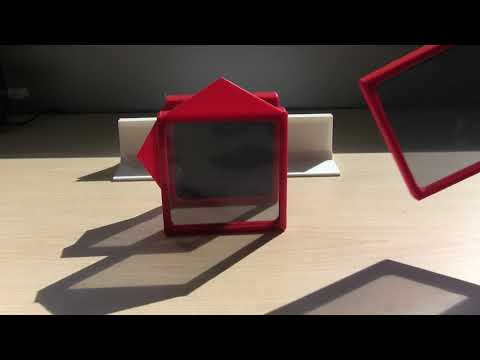

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('5SIxEiL8ujA', width=600, height=400,  playsinline=0, start=0)

Por otro lado, cuando $n_1 > n_2$, vemos que $R_\mathrm{TM} = R_\mathrm{TE} = 1.0$ sobre cierto ángulo. Este ángulo se denomina **ángulo crítico ($\theta_c$).** Para deterinar el ángulo crítico usamos la ley de Snell.

El ángulo máximo para la onda transmitida es $\theta_t = 90^o$, la ley de Snell nos indica que existe un ángulo crítico. Sobre este valor, no existe solución real.

\begin{equation}
n_1\sin\theta_c = n_2\sin90^o \Rightarrow \theta_c = \arcsin\left(n_2/n_1\right)
\end{equation}

**Para $\theta_i > \theta_c$, $R_\mathrm{TE} = R_\mathrm{TM} = 1$.**

Este mecanismo se llama **reflexión interna total** y es la base para el funcionamiento de fibras ópticas y lasers
<img src="./images/optical_fiber.png" width="450px" align= center>

El siguiente video resume los procesos de reflexión interna total y refracción que ocurren producto del cambio en el índice de refracción.

En el ejemplo, la interfaz es entre agua ($N_\mathrm{agua} =1.33$) y aceite ($N_\mathrm{oil} = 1.47$). Al agregar sal al agua (parte final del video), se induce un cambio gradual del índice de refracción (fuente [@uaiphysics](https://www.instagram.com/uaiphysics/?hl=es)).

<center><video controls muted src="../_static/videos/refraccíon_uaiphysics.mp4"  width="400px" align=center></video></center>

## Reflexión y transmisión en películas delgadas
En el caso materiales de película delgada, las ondas electromagnéticas se reflejan y transmiten múltiples veces.

<img src="./images/reflectance_thinfilm.png" width="600px" align= center>

### Coeficientes de Fresnel

Considerando los medios 1,2 y 3 ordenados consecutivamente en dirección de la onda incidente, con el medio 2 condicionado por un espesor $d$, se puede demostrar que en este caso los **coeficientes de Fresnel** son:

\begin{align}
r &= \frac{r_{12}+r_{23}e^{2i\varphi_2}}
          {1+r_{12}r_{23}e^{2i\varphi_2}}
\\[10pt]
t &= \frac{t_{12}t_{23}e^{i\varphi_2}}
          {1+r_{12}r_{23}e^{2i\varphi_2}}
\end{align}

donde $\varphi_2 = N_2k_0d\cos\theta_2$ ($\theta_2$ es el ángulo de transmisión en el medio 2); $r_{12}$, $r_{23}$ y $t_{12}$, $t_{23}$ son, respectivamente, los coeficientes de Fresnel desde el medio 1 al medio 2, y desde el medio 2 al medio 3. Estas fórmulas son válidas tanto para ondas TE como para ondas TM.

### Reflectividad y transmisividad

Basado en estas expresiones, podemos calcular la reflectividad y tranmissividad de la película:

\begin{align}
R = {\lvert r\rvert}^2 &= \frac{r_{12}^2+r_{23}^2+2r_{12}r_{23}\cos 2\varphi_2}
                              {1 + 2r_{12}r_{23}\cos 2\varphi_2 + r_{12}^2r_{23}^2}
\\[10pt]
T = \frac{n_3\cos\theta_t}{n_1\cos\theta_i}{\lvert t\rvert}^2 &= 
\frac{\left(1 - r_{12}^2\right)\left(1 - r_{23}^2\right)}
     {1 + 2r_{12}r_{23}\cos 2\varphi_2 + r_{12}^2r_{23}^2}
\end{align}

### Intererencia en ondas EM

Como ejemplo, consideremos la reflectividad de una película delgada de sílice (SiO$_2$) sobre un sustrato de silicio. Esta capa se genera naturalmente debido a la oxidación del silicio

<img src="./images/sio2_coating.png" width="600px" align= center>

Para simplificar, consideremos:
- índice de refracción del aire: 1.0
- índice de refracción de sílice: 1.5
- índice de refracción del silicio: 4.3
- espectro de longitudes de onda: 300 - 800 nm (visible)
- espesor del sílice, $d$: variable
- ángulo de incidencia $\theta_i$: variable

In [7]:
import numpy as np
from numpy import radians as rad # convertimos grados a radianes
import matplotlib.pyplot as plt
from empylib.waveoptics import multilayer

# Reflectividad en capa delgada
lam = np.linspace(0.3,0.8,100)          # longitud de onda (en um)
n_layers = (1.0,1.5,4.3)     # índices de refracción n1, n2, n3

# preparamos el ploteo
def plot_R_multi(theta,d):
    
    Rp = multilayer(lam, rad(theta),n_layers, (d,), 'TM')[0]
    Rs = multilayer(lam, rad(theta),n_layers, (d,), 'TE')[0]
    
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 3)
    plt.rcParams['font.size'] = '14'
    ax.plot(lam,Rp, label='$R_\mathrm{TM}$', color='red')
    ax.plot(lam,Rs, label='$R_\mathrm{TE}$',color='blue')
    ax.set_xlim([min(lam),max(lam)])
    ax.set_ylim([0,1.0])
    ax.set_xlabel('Longitud de onda ($\mu$m)')
    ax.set_ylabel('Reflectividad')
    ax.legend(frameon=False)
    plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1029/1845123263.py:19: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(lam,Rp, label='$R_\mathrm{TM}$', color='red')
/tmp/ipykernel_1029/1845123263.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(lam,Rs, label='$R_\mathrm{TE}$',color='blue')
/tmp/ipykernel_1029/1845123263.py:23: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('Longitud de onda ($\mu$m)')


In [8]:
from ipywidgets import interact

@interact(theta=(0,89,10), d=(0,1.0,0.01))
def g(theta=30, d=0.3):
    return plot_R_multi(theta,d)

interactive(children=(IntSlider(value=30, description='theta', max=89, step=10), FloatSlider(value=0.3, descri…

Esta oscilaciones en la reflectancia al variar $\theta_i$ y $d$ son el resultado de la **interferencia** entre las ondas reflejadas en la parte inferior y superior de la película de silicio.

<img src="./images/interference.png" width="350px" align= center>

En palabras simples, este fenómeno ocurre por qué la onda reflejada en la parte inferior de la película debe recorre un camino más largo. Esto produce un desface con las ondas reflejadas en la parte superior que deriva en interferencia constructiva (alta reflectividad) y destructiva (baja reflectividad)

Este fenómeno se manifiesta en forma de color ya que nuestros ojos son sensibles a los cambios de radiación en este espectro. 

> Se recomienda revisar esta [animación para entender el fenómeno](https://javalab.org/en/light_interference_on_cd_surface_en/)

Analicemos como se manifiesta este fenómeno en forma de color:

In [9]:
import numpy as np
from numpy import radians as rad # convertimos grados a radianes
import matplotlib.pyplot as plt
from empylib.waveoptics import multilayer
from empylib.ref_spectra import AM15
from empylib.ref_spectra import color_system as cs
cs = cs.hdtv

# Reflectividad en capa delgada
lam = np.linspace(0.3,0.8,100)   # longitud de onda (en um)
n_layers = (1.0,1.5,4.3)         # índices de refracción n1, n2, n3

cs.interp_internals(lam)
def color_R_film(d):
    Rp = lambda tt,d : multilayer(lam, rad(tt),n_layers, (d,), 'TM')[0]
    Rs = lambda tt,d : multilayer(lam, rad(tt),n_layers, (d,), 'TE')[0]
    
    # formateamos la figura
    fig, ax = plt.subplots()
    fig.set_size_inches(6, 4)
    plt.rcParams['font.size'] = '14'
    
    theta = np.linspace(0,90,100) # angulo de inciSdencia
    for tt in theta: 
        R = 0.5*Rp(tt,d) + 0.5*Rs(tt,d)
        Irad = R*AM15(lam)
        html_rgb = cs.spec_to_rgb(Irad, out_fmt='html')
        ax.axvline(tt, color=html_rgb, linewidth=6) 
    ax.set_xlim([min(theta),max(theta)])
    ax.set_ylim([0,1.0])
    ax.axes.yaxis.set_visible(False)
    ax.set_xlabel('Ángulo de incidencia (deg)')
    plt.show()

In [10]:
from ipywidgets import interact

@interact(d=(0,1.0,0.001))
def g(d=0.28):
    return color_R_film(d)

interactive(children=(FloatSlider(value=0.28, description='d', max=1.0, step=0.001), Output()), _dom_classes=(…

## Referencias
Griffths D., *Introduction to Electrodynamics*, 4th Ed, Pearson, 2013
- 7.3 Maxwell's Equations (7.36)
- 9 Electromagnetic Waves (9.3 y 9.4)